In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

# Assuming 'your_dataset.csv' is the name of your dataset file
file_path ='/content/drive/MyDrive/Dataset/output_file.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Count occurrences of labels
tcp_count = df[df['Label'] == 'TCP'].shape[0]
udp_count = df[df['Label'] == 'UDP'].shape[0]
benign_count = df[df['Label'] == 'BENIGN'].shape[0]

# Display the counts
print('TCP Count:', tcp_count)
print('UDP Count:', udp_count)
print('BENIGN Count:', benign_count)


<ipython-input-5-52e72a6f2206>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


TCP Count: 235479
UDP Count: 13048
BENIGN Count: 434


In [6]:
# Load your dataset (replace 'concatenated_data.csv' with your actual dataset file)
df = pd.read_csv('/content/drive/MyDrive/Dataset/output_file.csv')

<ipython-input-6-6b373fe72a44>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Dataset/output_file.csv')


In [ ]:
df.head(5)

,Unnamed: 0,Time,Source_ip,Destination_IP,Source_Port,Destination_Port,SYN,ACK,RST,Label
0,0,0.0,10.50.197.71,10.50.192.199,49543.0,443.0,Not set,Set,Not set,TCP
1,1,0.000002,10.50.192.199,10.50.197.71,443.0,49543.0,Not set,Set,Not set,TCP
2,2,0.00004,10.50.197.71,10.50.192.199,49543.0,443.0,Not set,Set,Not set,TCP
3,3,0.000042,10.50.192.199,10.50.197.71,443.0,49543.0,Not set,Set,Not set,TCP
4,4,0.000053,10.50.197.71,10.50.192.199,49543.0,443.0,Not set,Set,Not set,TCP


In [7]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import seaborn as sns
from pandas import DataFrame

In [8]:
df.shape

(261254, 10)

In [9]:
df.dtypes

Unnamed: 0            int64
Time                 object
Source_ip            object
Destination_IP       object
Source_Port         float64
Destination_Port    float64
SYN                  object
ACK                  object
RST                  object
Label                object
dtype: object

In [10]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# Assuming df['SYN'], df['ACK'], df['RST'], df['Label'], df['Time'] may have mixed types
df['SYN'] = df['SYN'].astype(str)
df['ACK'] = df['ACK'].astype(str)
df['RST'] = df['RST'].astype(str)
df['Label'] = df['Label'].astype(str)
df['Time'] = df['Time'].astype(str)
df['Source_ip'] = df['Source_ip'].astype(str)
df['Destination_IP'] = df['Destination_IP'].astype(str)
df['Source_Port'] = df['Source_Port'].astype(str)
df['Destination_Port'] = df['Destination_Port'].astype(str)

# Now apply LabelEncoder
df['SYN'] = le.fit_transform(df['SYN'])
df['ACK'] = le.fit_transform(df['ACK'])
df['RST'] = le.fit_transform(df['RST'])
df['Label'] = le.fit_transform(df['Label'])
df['Time'] = le.fit_transform(df['Time'])
df['Source_ip'] = le.fit_transform(df['Source_ip'])
df['Destination_IP'] = le.fit_transform(df['Destination_IP'])
df['Source_Port'] = le.fit_transform(df['Source_Port'])
df['Destination_Port'] = le.fit_transform(df['Destination_Port'])

In [11]:
df.dtypes

Unnamed: 0          int64
Time                int64
Source_ip           int64
Destination_IP      int64
Source_Port         int64
Destination_Port    int64
SYN                 int64
ACK                 int64
RST                 int64
Label               int64
dtype: object

In [12]:
df['Label'].value_counts()

12    235479
13     13048
5       3823
2       1579
4       1579
11      1577
3       1574
1       1212
14       589
0        434
15       245
6         69
8         21
9         16
10         6
7          3
Name: Label, dtype: int64

In [13]:
# Define a list of labels for 'TCP', 'UDP', and 'BENIGN'
selected_labels = [12, 13, 0]

# Filter the dataframe to include only selected labels
filtered_df = df[df['Label'].isin(selected_labels)]

# Display the value counts
label_counts = filtered_df['Label'].value_counts()
print(label_counts)


12    235479
13     13048
0        434
Name: Label, dtype: int64


In [14]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X = df.loc[:, ~df.columns.isin(['Label'])]
y = df.loc[:, df.columns.isin(['Label'])]

y_df = df['Label'].values
y_df

df.shape

missing_df = pd.DataFrame(df.isnull().sum())
missing_df

df= pd.DataFrame(df.fillna(0))
df.head(5)

df.isnull().sum()

X= df.loc[:, ~df.columns.isin(['Label','Time','Source_ip','Destination_IP','Source_Port','Destination_Port','SYN','ACK','RST',])]
y = df['Label'].values

X_test= df.loc[:, ~df.columns.isin(['Label','Time','Source_ip','Destination_IP','Source_Port','Destination_Port','SYN','ACK','RST'])]
y_test = df['Label'].values

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' is your Pandas DataFrame and 'y' is your label vector
# Replace X and y with your actual data
# Example data:
# X = your_dataframe
# y = your_label_vector

# Specify the selected labels
selected_labels = [12, 13, 0]

# Filter the dataset for the selected labels
filtered_indices = [i for i in range(len(y)) if y[i] in selected_labels]

X_selected = X.iloc[filtered_indices]
y_selected = y[filtered_indices]

# Split the filtered data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)

# Create a decision tree classifier
clf_selected = DecisionTreeClassifier()

# Train the classifier on the selected labels
clf_selected.fit(X_train_selected, y_train_selected)

# Make predictions on the test set
predictions_selected = clf_selected.predict(X_test_selected)

# Evaluate the model for the selected labels
accuracy_selected = accuracy_score(y_test_selected, predictions_selected)
print(f"Accuracy for selected labels: {accuracy_selected}")

# Display classification report for the selected labels
print("Classification Report for selected labels:")
print(classification_report(y_test_selected, predictions_selected))


Accuracy for selected labels: 0.9112325025606008
Classification Report for selected labels:
              precision    recall  f1-score   support

           0       0.07      0.11      0.09        74
          12       0.95      0.95      0.95     47062
          13       0.19      0.19      0.19      2657

    accuracy                           0.91     49793
   macro avg       0.40      0.42      0.41     49793
weighted avg       0.91      0.91      0.91     49793



Accuracy for selected labels: 0.9112325025606008
Classification Report for selected labels:
              precision    recall  f1-score   support

           0       0.07      0.11      0.09        74
          12       0.95      0.95      0.95     47062
          13       0.19      0.19      0.19      2657

    accuracy                           0.91     49793
   macro avg       0.40      0.42      0.41     49793
weighted avg       0.91      0.91      0.91     49793



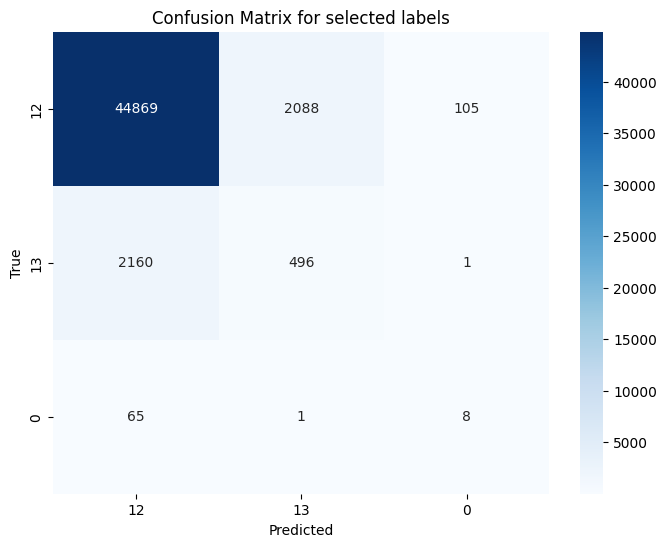

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'X' is your Pandas DataFrame and 'y' is your label vector
# Replace X and y with your actual data
# Example data:
# X = your_dataframe
# y = your_label_vector

# Specify the selected labels
selected_labels = [12, 13, 0]

# Filter the dataset for the selected labels
filtered_indices = [i for i in range(len(y)) if y[i] in selected_labels]

X_selected = X.iloc[filtered_indices]
y_selected = y[filtered_indices]

# Split the filtered data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)

# Create a decision tree classifier
clf_selected = DecisionTreeClassifier()

# Train the classifier on the selected labels
clf_selected.fit(X_train_selected, y_train_selected)

# Make predictions on the test set
predictions_selected = clf_selected.predict(X_test_selected)

# Evaluate the model for the selected labels
accuracy_selected = accuracy_score(y_test_selected, predictions_selected)
print(f"Accuracy for selected labels: {accuracy_selected}")

# Display classification report for the selected labels
print("Classification Report for selected labels:")
print(classification_report(y_test_selected, predictions_selected))

# Display confusion matrix for the selected labels
cm = confusion_matrix(y_test_selected, predictions_selected, labels=selected_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=selected_labels, yticklabels=selected_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for selected labels')
plt.show()


Accuracy for selected labels: 0.9451529331432129
Classification Report for selected labels:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
          12       0.95      1.00      0.97     47062
          13       0.00      0.00      0.00      2657

    accuracy                           0.95     49793
   macro avg       0.32      0.33      0.32     49793
weighted avg       0.89      0.95      0.92     49793



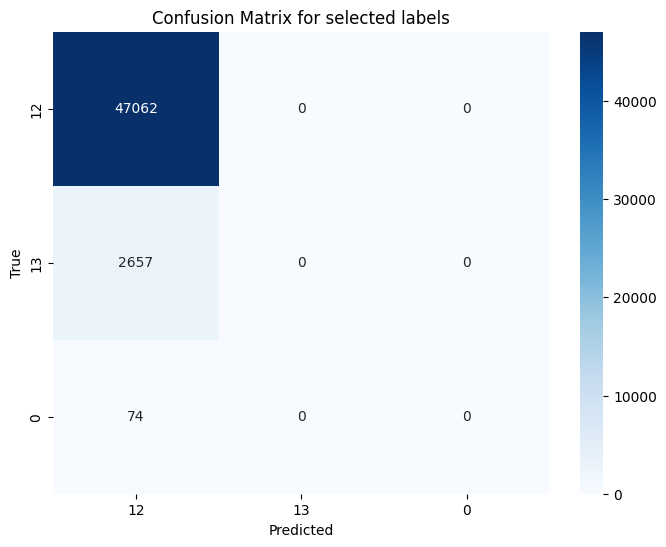

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'X' is your Pandas DataFrame and 'y' is your label vector
# Replace X and y with your actual data
# Example data:
# X = your_dataframe
# y = your_label_vector

# Specify the selected labels
selected_labels = [12, 13, 0]

# Filter the dataset for the selected labels
filtered_indices = [i for i in range(len(y)) if y[i] in selected_labels]

X_selected = X.iloc[filtered_indices]
y_selected = y[filtered_indices]

# Split the filtered data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)

# Create a Naive Bayes classifier (MultinomialNB)
clf_selected = MultinomialNB()

# Train the classifier on the selected labels
clf_selected.fit(X_train_selected, y_train_selected)

# Make predictions on the test set
predictions_selected = clf_selected.predict(X_test_selected)

# Evaluate the model for the selected labels
accuracy_selected = accuracy_score(y_test_selected, predictions_selected)
print(f"Accuracy for selected labels: {accuracy_selected}")

# Display classification report for the selected labels
print("Classification Report for selected labels:")
print(classification_report(y_test_selected, predictions_selected))

# Display confusion matrix for the selected labels
cm = confusion_matrix(y_test_selected, predictions_selected, labels=selected_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=selected_labels, yticklabels=selected_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for selected labels')
plt.show()


Training on Fold: 1
Epoch 1/10
5187/5187 [==============================] - 19s 3ms/step - loss: 0.0042 - accuracy: 0.9996 - val_loss: 3.1958e-05 - val_accuracy: 1.0000
Epoch 2/10
5187/5187 [==============================] - 19s 4ms/step - loss: 1.0595e-04 - accuracy: 1.0000 - val_loss: 3.5563e-04 - val_accuracy: 0.9999
Epoch 3/10
5187/5187 [==============================] - 17s 3ms/step - loss: 5.9599e-05 - accuracy: 1.0000 - val_loss: 3.4235e-07 - val_accuracy: 1.0000
Epoch 4/10
5187/5187 [==============================] - 18s 3ms/step - loss: 1.8749e-04 - accuracy: 1.0000 - val_loss: 1.1866e-06 - val_accuracy: 1.0000
Epoch 5/10
5187/5187 [==============================] - 19s 4ms/step - loss: 2.3426e-04 - accuracy: 1.0000 - val_loss: 4.4904e-06 - val_accuracy: 1.0000
Epoch 6/10
5187/5187 [==============================] - 17s 3ms/step - loss: 4.8844e-07 - accuracy: 1.0000 - val_loss: 4.4688e-09 - val_accuracy: 1.0000
Epoch 7/10
5187/5187 [==============================] - 18s 3ms/st

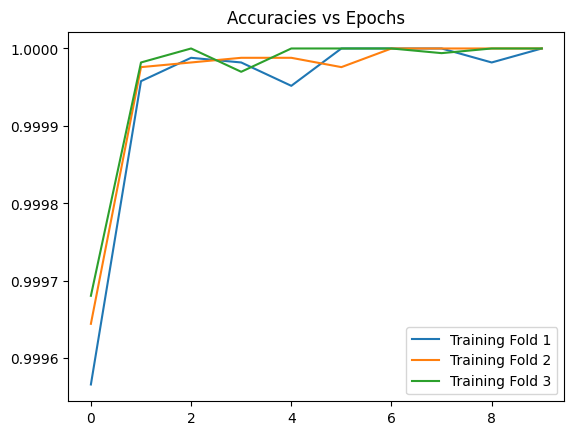

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe to include only selected labels
filtered_df = df[df['Label'].isin(selected_labels)]

# Separate features and labels
X = filtered_df.drop('Label', axis=1)  # Assuming 'Label' is the target column
y = filtered_df['Label']

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Number of folds for cross-validation
n_splits = 3

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store model history and confusion matrices for each fold
model_history = []
conf_matrices = []

# Iterate through the folds
for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape data for CNN input
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print("Training on Fold:", i+1)

    # Train the model
    history = model.fit(X_train_reshaped, y_train, epochs=10, validation_data=(X_test_reshaped, y_test), batch_size=32)

    # Evaluate the model on the test set
    y_pred_probs = model.predict(X_test_reshaped)
    y_pred = tf.argmax(y_pred_probs, axis=1)

    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    conf_matrices.append(conf_matrix)

    # Store the model history
    model_history.append(history)

# Plot accuracies versus epochs for each fold
plt.title('Accuracies vs Epochs')
for i, history in enumerate(model_history):
    plt.plot(history.history['accuracy'], label=f'Training Fold {i+1}')

plt.legend()
plt.show()


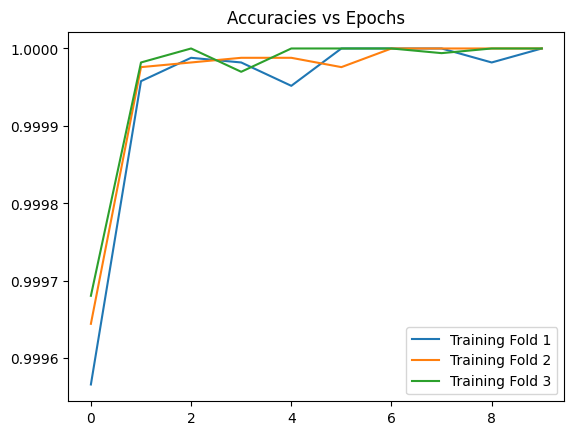

In [ ]:
plt.title('Accuracies vs Epochs')
plt.plot(model_history[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_history[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_history[2].history['accuracy'], label='Training Fold 3')
plt.legend()
plt.savefig('/content/drive/MyDrive/Dataset/kfold_accurcy.png')
plt.show()